In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ann_model = Sequential()

In [ ]:
ann_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(3, activation='softmax'))

In [ ]:
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

In [ ]:
history = ann_model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, verbose=0)

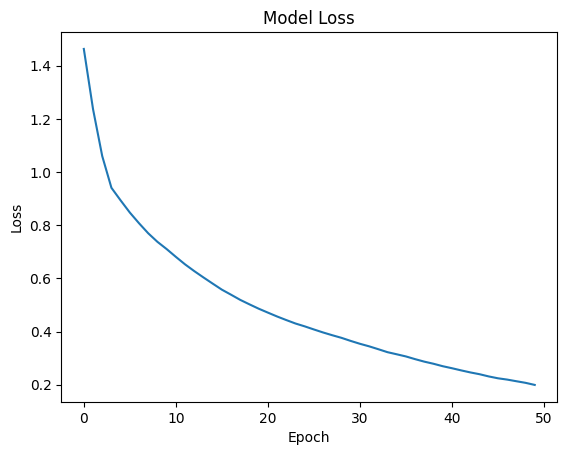

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
feature_extractor = Sequential(ann_model.layers[:-1])
extracted_features_train = feature_extractor.predict(X_train)
extracted_features_test = feature_extractor.predict(X_test)

1/1 [==============================] - 0s 16ms/step


In [ ]:
scaler = StandardScaler()
extracted_features_train_normalized = scaler.fit_transform(extracted_features_train)
extracted_features_test_normalized = scaler.transform(extracted_features_test)

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(extracted_features_train_normalized, y_train)

SVC(kernel='linear')

In [ ]:
svm_predictions = svm_model.predict(extracted_features_test_normalized)
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [ ]:
print("Accuracy of SVM classifier:", svm_accuracy)

Accuracy of SVM classifier: 1.0
